# 04 Clustering and Dimensionality Reduction

**Objective:**
Perform unsupervised clustering on FFT-derived features and visualize cluster structure using PCA and t-SNE embeddings.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from modeling.dimensionality_reduction import pca_reduce, tsne_reduce
from utils.plotting import plot_clusters
from utils.config import DATA_DIR

## 1. Load FFT Feature Matrix
Load the feature matrix generated in Notebook 2.

In [2]:
features_path = os.path.join(DATA_DIR, 'X_fft.npy')
if not os.path.isfile(features_path):
    raise FileNotFoundError(f"Could not find feature matrix at {features_path}."
                             " Run 02_fft_feature_extraction first.")
X_fft = np.load(features_path)
print(f"Loaded FFT feature matrix: {X_fft.shape[0]} samples, {X_fft.shape[1]} features each.")

Loaded FFT feature matrix: 140 samples, 20 features each.


## 2. PCA for 2D Visualization
Apply PCA to reduce feature space to 2 dimensions.

In [3]:
X_pca = pca_reduce(X_fft, n_components=2)
print(f"PCA output shape: {X_pca.shape}")

PCA output shape: (140, 2)


## 3. K-Means Clustering
Use K-Means on the full FFT features, then plot clusters in PCA space.

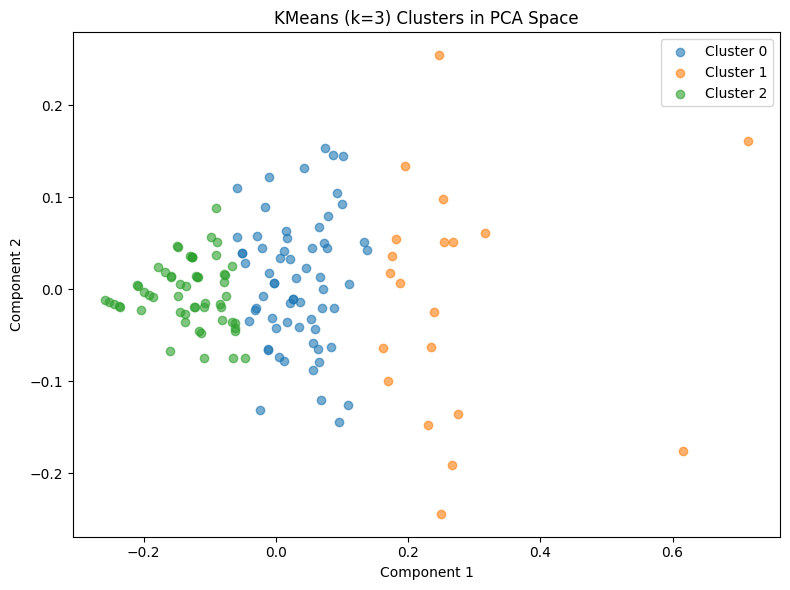

In [4]:
# Perform K-Means clustering
n_clusters = 3  # adjust as desired
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
km_labels = kmeans.fit_predict(X_fft)

# Plot in PCA space
def_labels = list(range(n_clusters))
plot_clusters(
    X_pca,
    km_labels,
    title=f'KMeans (k={n_clusters}) Clusters in PCA Space'
)

## 4. DBSCAN Clustering
Apply DBSCAN to find dense regions and plot in PCA space.

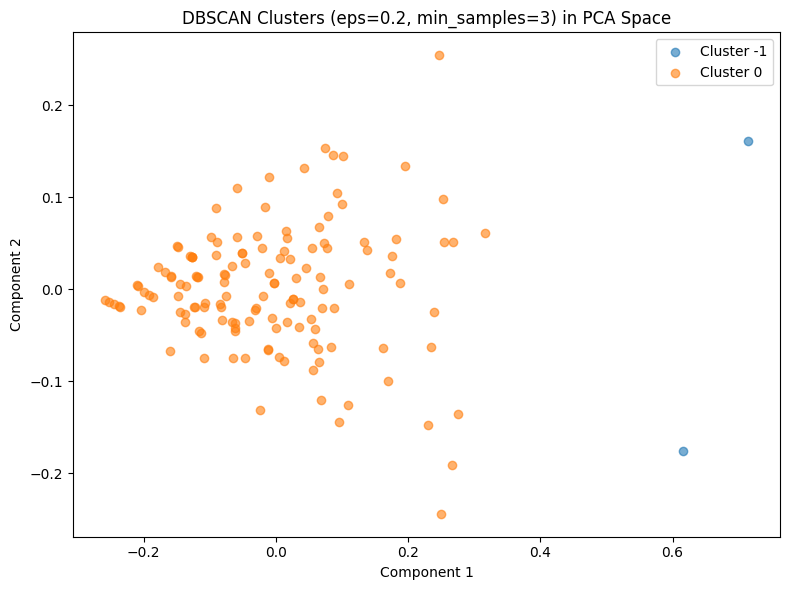

In [7]:
# DBSCAN parameters can be tuned (eps, min_samples)
eps = 0.2
min_samples = 3
db = DBSCAN(eps=eps, min_samples=min_samples)
db_labels = db.fit_predict(X_fft)

plot_clusters(
    X_pca,
    db_labels,
    title=f'DBSCAN Clusters (eps={eps}, min_samples={min_samples}) in PCA Space'
)

## 5. t-SNE Visualization
Compute a t-SNE embedding (2D) of the FFT features and plot the K-Means clusters.

/Users/yechanjeong/Desktop/computational_python/FFT_Project/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


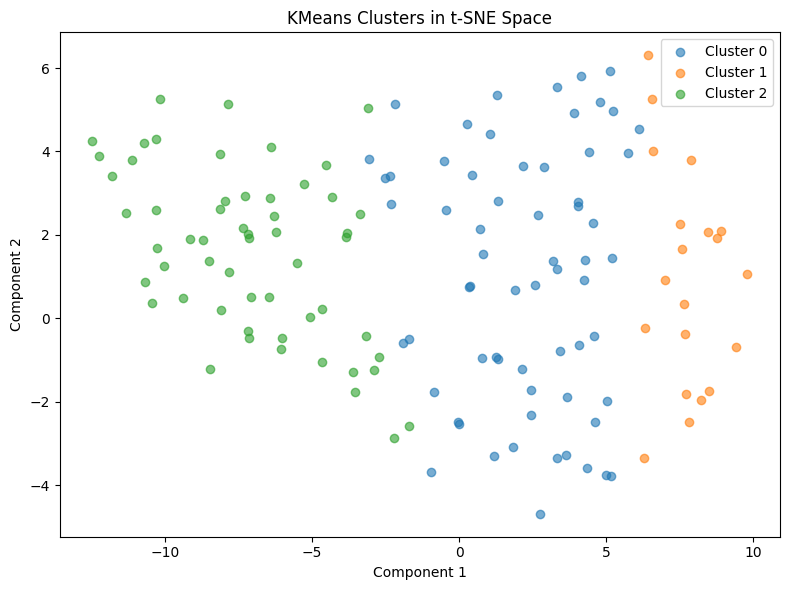

In [8]:
# t-SNE embedding
X_tsne = tsne_reduce(X_fft, n_components=2)
plot_clusters(X_tsne, km_labels, title='KMeans Clusters in t-SNE Space')